# **Proyecto: Detección de diabetes**

Se pretende hacer un detector de diabetes. Lo podemos definir como un problema de clasificacion binaria i.e, donde una clase define sí tener diabetes y la otra clase define no tiener diabetes.

Usaremos 5 métodos de aprendizaje supervisado:

* [**Modelo de Bayes Naïve**](#scrollTo=VDKpdJmiVrQ_&line=1&uniqifier=1)
* [**Modelo de Regresión logística**](#scrollTo=VDKpdJmiVrQ_&line=1&uniqifier=1)
* [**Modelo de árbol de decisión**](#scrollTo=7TI9QoqVWy5f&line=4&uniqifier=1)
* [**Modelo K-NN (K Nearest Neighbors)**](#scrollTo=7TI9QoqVWy5f&line=4&uniqifier=1)
* [**Modelo NN (Redes Neuronales)**](#scrollTo=7TI9QoqVWy5f&line=4&uniqifier=1)


## **1. Descripción Dataset**
EL conjunto d edatos es de: National Institute of Diabetes and Digestive and Kidney
Diseases.
\
Se puede consultar en:
https://www.kaggle.com/datasets/whenamancodes/predict-diabities

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_set_entrenamiento/I.A./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<b>En donde:</b> \
Pregnancies~ embarazos\
Glucose~glucosa en la sangre\
BloodPressure ~presion arterial	
SkinThickness ~ espesor de la piel del triceps\
Insulin ~ insulina en la sangre 	
BMI ~ indice de masa corporal	
DiabetesPedigreeFunction	~ ascendencia en la enfermedad  \
Age ~años

In [ ]:
#presentamos los datos estadisticos: la media, la desviacion estandar, los valores maximos y minimos asi como los percentiles  
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


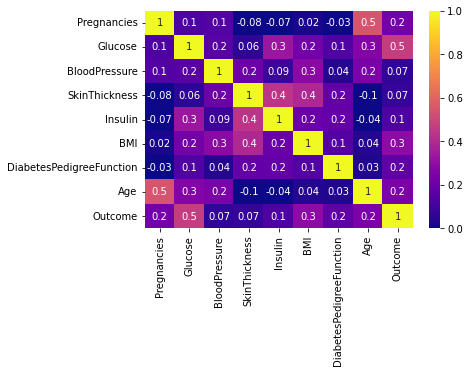

In [ ]:
#veamos como se correlacionan dichos datos 
sns.heatmap(df.corr(), annot=True, fmt='.1g', vmin=0, vmax=1, cmap='plasma')

In [ ]:
#dado la poca correlacion de las siguientes variables para el modelo  podemos quitarlas 
df_selected=df.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [ ]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
df_new.head()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (768). n_quantiles is set to n_samples.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(


,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.097784,0.644720,0.227510,0.558670,0.0
2,0.863755,0.956975,0.000000,0.091917,0.585398,1.0
3,0.232725,0.131030,0.505867,0.298566,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


###Ahora hagamos la división de los datos 

In [ ]:
#empezamos eligiendo los datos de entrenamiento y quitando dicha columna
target_name='Outcome'
y= df_new[target_name]
X=df_new.drop(target_name,axis=1)
X.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.097784,0.644720,0.227510,0.558670
2,0.863755,0.956975,0.000000,0.091917,0.585398
3,0.232725,0.131030,0.505867,0.298566,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [ ]:
#lo dividiremos en 80% para entrenar y 20% para probar
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)

## **2. Descripción de los algoritmos**

### Algoritmos paramétricos


*  **Modelo de Bayes Naïve**: Es un modelo gráfico dirigido (y generativo) para
clasificación de Aprendizaje Automatico, que se basan en una técnica de clasificación estadística llamado “teorema de Bayes”, el cual se calcula con una probabilidad posterior a que ocurra un cierto evento A, esto dado algunas probabilidades de eventos pasados, la formula de este calculo esta dado por lo siguiente:

$$\hat{y} = \arg\max_y p(y,x_1,x_2,...,x_d; \theta) = \arg\max_y \prod_{i=1}^d p(x_i|y)p(y)$$

* **Modelo de Regresión logística**: Los modelos de regresion logisticos son modelos de regresión que permiten estudiar si una variable binomial depende, o no, de otra u otras variables no necesariamente binomiales, esto para predecir la presencia o ausencia de una característica o resultado según las variables dadas, este modedo es usualmente usado en las ciencias médicas y sociales por ello se acopla a nuestro proyecto, la formula de este calculo esta dado por lo siguiente:

$$\hat{y} = \arg\max_y p(y|x_1,...,x_d; \theta) = \arg\max_y \frac{1}{1+exp\{-\sum_{i=1}^d \theta_i x_i + \theta_0\}}$$

* **Modelo de Redes Neuronales**: Los Modelos de Redes Neuronales tratan de resolver problemas intuyendo como funciona la lógica humana, en este caso usaremos una de las redes neuronales más simples llamada FeedForward, donde basicamente tendremos un conjunto de capas que contendrán nuestras 'neuronas' cada una de estas capas aprenderá una representación de nuestros datos para luego poder clasificarlos. 


### Algoritmos no paramétricos


* **Modelo de árbol de decisión**: Un árbol de decisión es un árbol cuyos nodos representan valores de los rasgos de los datos; los
hijos de los nodos responden a decisiones sobre estos valores y las hojas del árbol son clases a
las que pueden pertenecer los datos, asi mismo el algoritmo a seguir en este modelo es el siguiente:

$$Gini = 1 - \sum_{i=1}^c p_i^2$$


* **Modelo K-NN (K Nearest Neighbors)**: El algoritmo de k vecinos más cercanos (k-NN) es un algoritmo no paramétrico de clasificación y aprendizaje supervisado, que estima la clase $\hat y$ de un dato $x$ en base a los vecinos más cercanos a este ; es decir:
$$\hat y=\arg\max_{x^´\to y}\{||x-x^{(i)}||_p\}^k_{i=1},$$
donde se cumple la condición:
$$||x-x^{(1)}||_p\le||x-x^{(2)}||_p\le\ldots\le||x-x^{(N)}||_p.$$
Y los parámetros del algoritmo son los $k$ vecinos a considerar, y $p$ que determina la métria a utilizar.

## **3. Implementación de los algoritmos**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

###Bayes Naïve

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score

param_grid_nb = {
    'var_smoothing': np.logspace(0,-2, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)

In [ ]:
nbModel_grid.fit(X_train, y_train).best_params_

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


{'var_smoothing': 0.3944206059437655}

In [ ]:
best_model_nb = GaussianNB(var_smoothing =  0.3944206059437655)

In [ ]:
best_model_nb.fit(X_train,y_train)

GaussianNB(var_smoothing=0.3944206059437655)

####Evaluación de *Bayes Naïve*

Para evaluar cada uno de los resultados de cada métrica, utilizamos las métricas usuales:

* Precisión: $$Prec = \frac{TP}{TP+TN}$$
* Exahustividad: $$Rec = \frac{TP}{TP+FN}$$
* Métrica F1: $$F_1 = \frac{2 Prec*Rec}{Prec + Rec}$$

Así como los promedios macro y pesado de cada algoritmo.

In [ ]:
nb_pred=best_model_nb.predict(X_test)

Así que, por el método *Bayes Naïve* obtenemos el siguiente resultado:

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       107
         1.0       0.65      0.55      0.60        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.77      0.77      0.77       154


 F1:
 0.5977011494252874

 Precision score is:
 0.65

 Recall score is:
 0.5531914893617021

 Confusion Matrix:



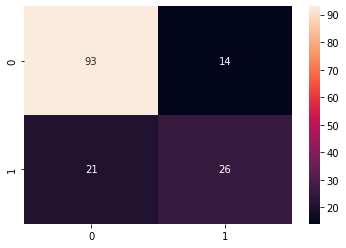

In [ ]:
print("Classification Report is:\n",classification_report(y_test,nb_pred))
print("\n F1:\n",f1_score(y_test,nb_pred))
print("\n Precision score is:\n",precision_score(y_test,nb_pred))
print("\n Recall score is:\n",recall_score(y_test,nb_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,nb_pred),annot=True)

###Regresión logística 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
reg = LogisticRegression()
reg.fit(X_train,y_train)

LogisticRegression()

#### Evaluación de *Regresión logística*

In [ ]:
lr_pred=reg.predict(X_test)

De método *Regresión logística* se obtiene:

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.89      0.85       107
         1.0       0.68      0.55      0.61        47

    accuracy                           0.79       154
   macro avg       0.75      0.72      0.73       154
weighted avg       0.78      0.79      0.78       154


 F1:
 0.611764705882353

 Precision score is:
 0.6842105263157895

 Recall score is:
 0.5531914893617021

 Confusion Matrix:



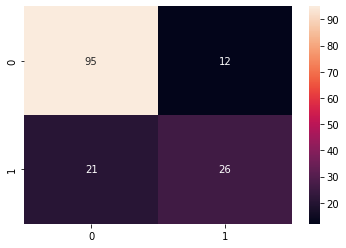

In [ ]:
print("Classification Report is:\n",classification_report(y_test,lr_pred))
print("\n F1:\n",f1_score(y_test,lr_pred))
print("\n Precision score is:\n",precision_score(y_test,lr_pred))
print("\n Recall score is:\n",recall_score(y_test,lr_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True)

### Modelo de Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
params = {
    'max_depth': [5, 10, 20,25],
    'min_samples_leaf': [10, 20, 50, 100,120],
    'criterion': ["gini", "entropy"]}

In [ ]:
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
grid_search.fit(X_train, y_train).best_params_

Fitting 4 folds for each of 40 candidates, totalling 160 fits


{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 50}

In [ ]:
best_model_dt = DecisionTreeClassifier(random_state=42,criterion= 'gini', max_depth = 5, min_samples_leaf = 50) 

In [ ]:
best_model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, random_state=42)

#### Evaluación de *Árboles de desición*


In [ ]:
dt_pred=best_model_dt.predict(X_test)

Por *Árboles de desición* llegamos a que:

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       107
         1.0       0.78      0.45      0.57        47

    accuracy                           0.79       154
   macro avg       0.79      0.70      0.72       154
weighted avg       0.79      0.79      0.77       154


 F1:
 0.5675675675675675

 Precision score is:
 0.7777777777777778

 Recall score is:
 0.44680851063829785

 Confusion Matrix:



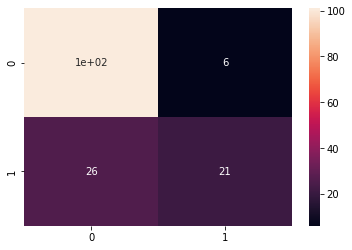

In [ ]:
print("Classification Report is:\n",classification_report(y_test,dt_pred))
print("\n F1:\n",f1_score(y_test,dt_pred))
print("\n Precision score is:\n",precision_score(y_test,dt_pred))
print("\n Recall score is:\n",recall_score(y_test,dt_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,dt_pred),annot=True)

### K-NN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

In [ ]:
#Lista de hiperparametros para realizar la búsqueda
knn= KNeighborsClassifier()
n_neighbors = list(range(15,25))
p=[1,2]
weights = ['uniform', 'distance']
metric = ['euclidean', 'manhattan', 'minkowski']

# Los convertimos en diccionario (asi lo requiere GridSearchCV)
hyperparameters = dict(n_neighbors=n_neighbors, p=p,weights=weights,metric=metric)

# Creamos y obtenemos el modelo para encontrar los mejores hiperparametros
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='f1',error_score=0)

In [ ]:
best_model_knn = grid_search.fit(X_train,y_train)

In [ ]:
# Valores encontrados
print('Best leaf_size:', best_model_knn.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model_knn.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model_knn.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 30
Best p: 1
Best n_neighbors: 15


#### Evaluación de *K-NN*

In [ ]:
#Predict testing set
knn_pred = best_model_knn.predict(X_test)

Y por el método *K-NN* se tiene que:

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.91      0.87       107
         1.0       0.73      0.57      0.64        47

    accuracy                           0.81       154
   macro avg       0.78      0.74      0.75       154
weighted avg       0.80      0.81      0.80       154


 F1:
 0.6428571428571429

 Precision score is:
 0.7297297297297297

 Recall score is:
 0.574468085106383

 Confusion Matrix:



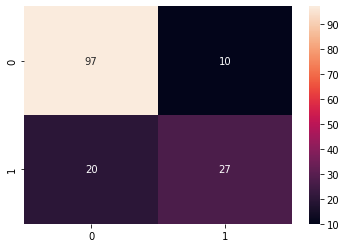

In [ ]:
print("Classification Report is:\n",classification_report(y_test,knn_pred))
print("\n F1:\n",f1_score(y_test,knn_pred))
print("\n Precision score is:\n",precision_score(y_test,knn_pred))
print("\n Recall score is:\n",recall_score(y_test,knn_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,knn_pred),annot=True)

### Red neuronal feed forward

Lo que haremos en esta sección, será encontrar una red neuronal feed forward que resuelva nuestro problema. Lidiamos con un problema de clasificación binaria y vectores de datos numéricos

Al Usar MLPClassifier vamos a desarrollar una red neuronal del perceptrón multicapa (por ello el nombre de MLP: Multi-layer Perceptron), donde optimizaremos el error de la entropía cruzada binaria.

In [ ]:
from sklearn.neural_network import MLPClassifier

Sabemos que las redes neuronales dependen mucho de los datos de entrada y siempre es una buena práctica el normalizar la entrada para un mejor resultado



In [ ]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)  
# Creamos nuestros datos normalizados
X_train_c = scaler.transform(X_train).copy()  
# Aplicamos la misma transformación a los datos de salida
X_test_c = scaler.transform(X_test).copy()

Dado que tenemos que definir cuantas capas ocultas y unidades por capa querremos para el modelo, haremos una busqueda en malla (Search Grid) para obtener los mejores parámetros (en este caso buscaremos en redes neuronales de la forma i unidades ocultas y k capas ocultas)

In [ ]:
# Aqui correremos para muchas configuraciones (estamo)
maxi,maxj = 0,0
val = 0
for i in range(1,10):
    for k in range(1,30):
        capas = i*np.ones(k, dtype = int).ravel()
        clf = MLPClassifier(solver='lbfgs', alpha=1e-5, activation = 'relu', learning_rate='constant', learning_rate_init=1e-3, 
                      max_iter = 10000, verbose = False, early_stopping = True, n_iter_no_change = 50,  validation_fraction = 0.1,
                    hidden_layer_sizes= capas, random_state=1)
        clf.fit(X_train_c,y_train)
        mlp_pred = clf.predict(X_test_c)
        z = f1_score(y_test,mlp_pred)
        if z > val:
            maxi = k
            maxj = i
            val = z
        print('tenemos:{},{},{}'.format(maxj,maxi,val))

tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:1,1,0.5977011494252874
tenemos:2,1,0.6046511627906976
tenemos:2,2,0.6741573033707866
tenemos:2,2,0.6741573033707866
tenemos:

Como vemos que el mejor F1-Score (que resume bien la precision y el recall) se alcanza en una red neuronal con 12 capas ocultas y 9 unidades ocultas por capa, nos quedaremos con ese modelo.

In [ ]:
h , k = (9,12)
capas = h*np.ones(k, dtype = int).ravel()
capas

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

Aqui tenemos una red neuronal feedforward con 12 capas ocultas y 9 unidades ocultas por capa, con función de activación ReLU para cada capa oculta, asumimos un parámetro de aprendizaje constante 0.001, un valor para el parámetro de regularización L2 de 0.00001 y usaremos una función de optimizacion basada en los metodos de Quasi-Newton (pues se alcanzan mejores resultados con ellos comparandolo con Adam y Gradiente Descendiente Estocástico).

In [ ]:
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5, activation = 'relu', learning_rate='constant', learning_rate_init=1e-3, 
                  max_iter = 2000,
                 hidden_layer_sizes= capas, random_state=1)

In [ ]:
clf2.fit(X_train_c,y_train)

MLPClassifier(alpha=1e-05,
              hidden_layer_sizes=array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]),
              max_iter=2000, random_state=1, solver='lbfgs')

In [ ]:
mlp_pred = clf2.predict(X_test_c)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.88      0.81      0.84       107
         1.0       0.64      0.74      0.69        47

    accuracy                           0.79       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.80      0.79      0.80       154


 F1:
 0.6862745098039216

 Precision score is:
 0.6363636363636364

 Recall score is:
 0.7446808510638298

 Confusion Matrix:



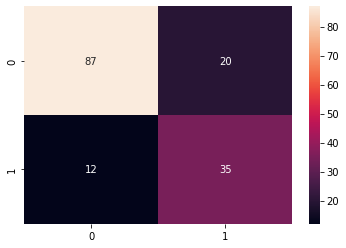

In [ ]:
print("Classification Report is:\n",classification_report(y_test,mlp_pred))
print("\n F1:\n",f1_score(y_test,mlp_pred))
print("\n Precision score is:\n",precision_score(y_test,mlp_pred))
print("\n Recall score is:\n",recall_score(y_test,mlp_pred))
print("\n Confusion Matrix:\n")
sns.heatmap(confusion_matrix(y_test,mlp_pred),annot=True)

###Comparativa de métodos

A partir de la evaluación realizada se pueden tener los siguientes resultados donde se comparan los 5 modelos que se usaron:

|<b>Modelo</b> | <b>Accuracy</b> |<b>Precisión</b> |<b>Recall</b> |<b>F1</b>
|---- |---- |---- |---- |----
|Bayes Naïve | 0.77 | 0.65 | 0.55 | 0.59
|Regresión logística | 0.79 | 0.68 | 0.55 | 0.61
|Árboles de decisión | 0.79 | <b>0.77 <b>| 0.44 | 0.56
|K-NN | <b>0.81<b> | 0.72| 0.57 | 0.64
|Redes Neuronales | 0.79 | 0.64 | <b>0.74<b> | <b>0.69<b>

Por lo tanto podemos ver que el modelo con el mejor desempeño, mas equilibrado en los 4 aspectos es el modelo de K-NN.



## **4. Conclusiones**

Las diferencias entre los cinco modelos se pueden observar en tanto que el primero, *Bayes Naïve*, es un modelo generativo  y como usamos un modelo gaussiano, los parámetros responden a la media y la varianza de cada uno de los rasgos:

In [ ]:
bayes_weights = pd.DataFrame(data=best_model_nb.theta_, index=['Media 0','Media 1'], columns = X_train.columns)
bayes_weights.T

,Media 0,Media 1
Pregnancies,0.453615,0.550420
Glucose,0.398527,0.682585
SkinThickness,0.437346,0.493643
BMI,0.438205,0.629512
Age,0.434519,0.628419


In [ ]:
bayes_sigma = pd.DataFrame(data=best_model_nb.sigma_, index=['Media 0','Media 1'], columns = X_train.columns)
bayes_sigma.T

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


,Media 0,Media 1
Pregnancies,0.129721,0.156630
Glucose,0.113496,0.107915
SkinThickness,0.153667,0.177678
BMI,0.130999,0.105446
Age,0.134983,0.106203


El segundo,  *Regresión logística*, es un modelo discriminativo que se puede interpretar por los parámetros o pesos que asigna a cada rasgo:

In [ ]:
logit_weights = pd.DataFrame(data=reg.coef_, index=['Peso'], columns=X_train.columns)
logit_weights.T

,Peso
Pregnancies,0.199666
Glucose,2.989732
SkinThickness,0.145784
BMI,1.838940
Age,1.592344


El tercero,  *Arbol de Decisión*, es un modelo donde se clasifican los datos creando reglas entre estos, que podemos observar de la siguiente manera

In [ ]:
text_representation = tree.export_text(best_model_dt)
print(text_representation)

|--- feature_1 <= 0.58
|   |--- feature_4 <= 0.48
|   |   |--- feature_3 <= 0.45
|   |   |   |--- feature_2 <= 0.37
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_2 >  0.37
|   |   |   |   |--- class: 0.0
|   |   |--- feature_3 >  0.45
|   |   |   |--- class: 0.0
|   |--- feature_4 >  0.48
|   |   |--- feature_1 <= 0.26
|   |   |   |--- class: 0.0
|   |   |--- feature_1 >  0.26
|   |   |   |--- class: 0.0
|--- feature_1 >  0.58
|   |--- feature_3 <= 0.40
|   |   |--- class: 0.0
|   |--- feature_3 >  0.40
|   |   |--- feature_1 <= 0.86
|   |   |   |--- feature_4 <= 0.57
|   |   |   |   |--- class: 0.0
|   |   |   |--- feature_4 >  0.57
|   |   |   |   |--- class: 1.0
|   |   |--- feature_1 >  0.86
|   |   |   |--- class: 1.0



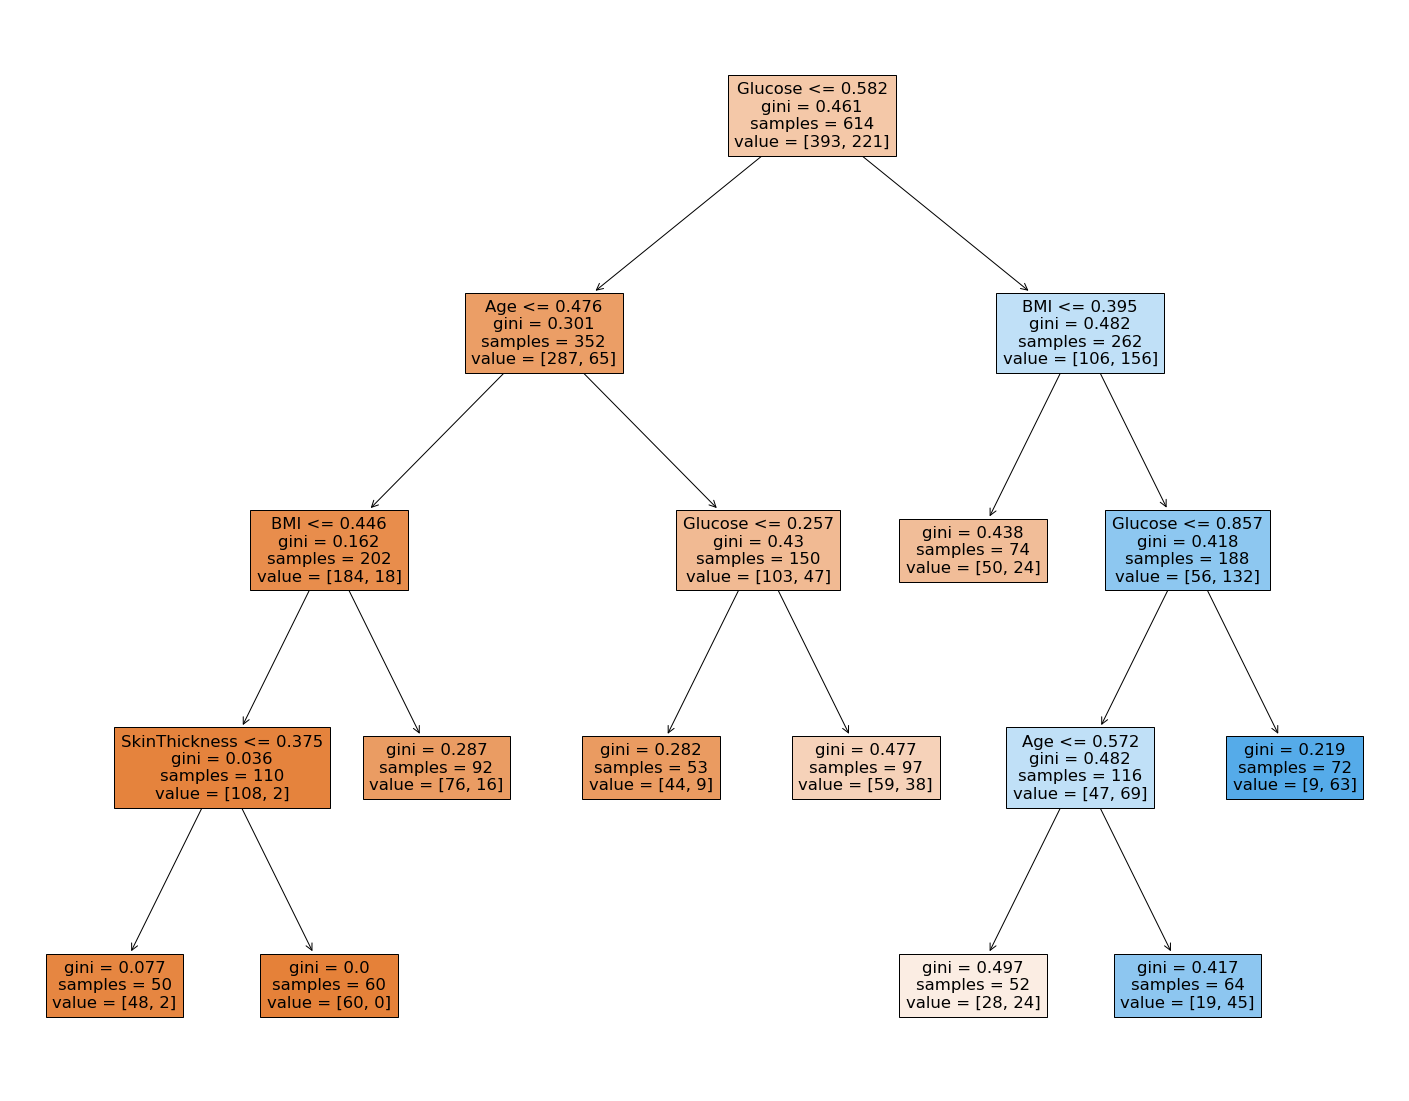

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(best_model_dt, 
                   feature_names = X_train.columns,  
                
                   filled=True)

El cuarto,  *K-NN*, es un modelo de clasificacion donde nos basamos en que clases están más cerca de nuestros valores para poder predecir correctamente, dado que nuestros datos están más allá de las tres dimensiones, no podemos represntarlos en una gráfica

El quinto,  *NN*, Es un modelo más complejo donde tenemos que mejorar muchos parámetros ( tantos como capas y unidades ocultas pondrámos ) basandonos en BackPropagation para el cálculo de cada derivada de nuestra función de error con respecto a todos los parámetros (pesos) que tengamos, si tenemos muchas capas, podemos crear modelos demasiado complejos para nuestro problema, por lo que debemos tener cuidado seleccionando nuestro modelo por lo que consideramos usar Regularización L2 para no caer en el Overfitting. 
Similar al K-NN, representar lo que aprender cada capa se hace muy complejo, en esta parte, se hace poco intutivo lo que está aprendiendo la red neuronal.

La selección del mejor modelo dependerá totalmente en nuestro objetivo al crear este detector de diabetes. Vemos que el K-NN posee el valor más alto en cuanto a precisión, pero tambien debemos apreciar que las NN poseen el valor más alto en Recall. Basicamente, las NN diran a algunas personas que no son diabéticas, que sí lo son. Pero también recuperará la mayor cantidad de personas diabéticas comparandolos contra los demás modelos. Así que dependiendo de que tan seria es la enfermedad, posiblemente elegir el modelo con mayor Recall sea la mejor opcion